In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from matplotlib.colors import LogNorm
import cdflib
from matplotlib import ticker, cm

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Cluster_data/C2_CP_PEA_PITCH_SPIN_DEFlux__20040302_085105_20040302_101929_V170624.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 time_tags__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1320]
1 time_tags_DeltaLower__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
2 time_tags_DeltaUpper__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
3 Angle_SR2phi__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320]
4 Mode_SunpulseRephaseOffset__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
5 Mode_Sensor__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
6 Mode_SweepMode_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
7 Mode_Preset_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
8 Mode_EnergyLevelRange_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320, 2]
9 Mode_EnergyMaxMin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1320, 2]
10 Mode_MCPlevel_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
11 Mode_DataOrigin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
12 Mode_SweepMode_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
13 Mode_Preset_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1320]
14 Mode_EnergyLevelRange_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux 

In [3]:
epoch = cdf[0][...]
data = cdf[26][...]
energy = cdf[20][...]
pa = cdf[23][...]

# Flux vs pitch angle #

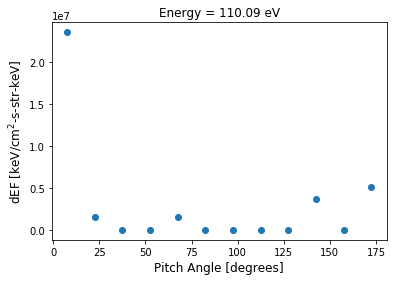

FWHM =  2
energies =  [2531.    2030.1   1621.7   1296.2   1039.9    832.28   669.21   534.17
  428.84   342.73   273.     217.89   173.09   139.08   110.09    87.464
   70.462   56.717   47.865   37.66    30.091   24.348   19.568   15.779
   12.543   10.073    8.47     7.294    6.251    5.252]


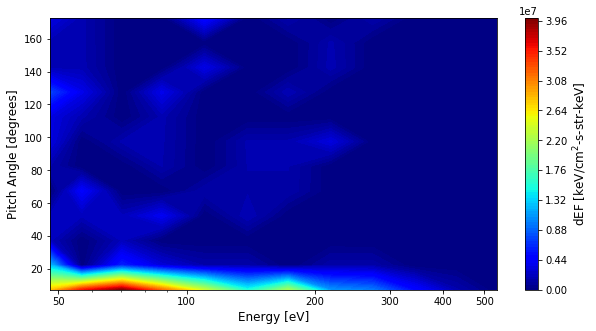

In [4]:
# 3D resolution plotting:
# for j in range(16):
#        X, Y = np.meshgrid(pa, az[13])
#        fig = plt.figure(figsize=(10,5))
#        ax = plt.axes(projection='3d')
#        #ax = plt.axes()
#        D = data[13,0:len(az[13]),0:len(pa),j]
#        surf = ax.contourf(Y, X, D, 100, cmap=cm.jet)
#        cbar = fig.colorbar(surf)
#        cbar.set_label('Density')
#        ax.set_ylabel('Pitch Angle')
#        ax.set_xlabel('Azimuth')
#        ax.set_zlabel('Density')

time = 500

#PITCH_SPIN line plotting:

for n in range(14,15):
    y = data[time,0:12,n]
    #plt.plot(pa,y)
    
    t = np.polyfit(pa[0:12], y, 5)
    f = np.poly1d(t)
    pa_new = np.linspace(pa[0], pa[11], 50)
    y_new = f(pa_new)
    #plt.plot(pa[0:12],y,'o', pa_new, y_new)
    plt.scatter(pa[0:12],y)
    plt.title("Energy = " + str(energy[time,n]) + " eV")
    plt.xlabel("Pitch Angle [degrees]",fontsize=12)
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.show()
    xs = [x for x in range(50) if y_new[x] > np.max(y_new)/2.0]
    if np.mean(y_new)>0:
        fwhm = np.max(xs)-np.min(xs)
        print('FWHM = ', fwhm)
    
#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy[time,7:19],pa)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = data[time,0:len(pa),7:19]
#surf = ax.pcolormesh((X), Y, D, cmap=cm.jet)
surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=12)
ax.set_ylabel('Pitch Angle [degrees]',fontsize=12)
ax.set_xlabel('Energy [eV]',fontsize=12)
ax.set_xscale('log')
ax.set_xticks([50, 100, 200, 300, 400, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.set_xlim(0,5)

print('energies = ', energy[time,0:30])


In [5]:
#epoch = 10,20...
ten_targets = [0,0,0,1,1,1,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,1,0,0,0,0,0, 0,0,0,1,0,1,1,1,1,1,1,1, 0,0,0,1,1,1,1,1,1,1,1,1, 0,0,1,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0,0,0,0, 0,0,0,1,1,1,1,1,1,1,1,1, 0,0,1,1,1,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1,1,1,1, 0,0,0,1,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,1,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,0,0,0,0,1,1,1,1,1,1,1, 0,1,1,1,1,1,1,1,1,1,1,1]
print(len(ten_targets))
print(ten_targets)
print(Counter(ten_targets))

240
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Counter({1: 146, 0: 94})


In [6]:
fluxes = []
for i in range(20):
    for j in range(7,19):
        flux = data[i*10+10,0:12,j]
        flux[flux == -1.] = 0.
        
        #if np.max(flux)>0:
        #    flux = (flux-np.min(flux))/(np.max(flux)-np.min(flux))
            
        #flux = (flux-np.min(flux))/np.max(data[0:len(epoch),0:12,j])
        
        fluxes.append(flux)
        
#fluxes = StandardScaler().fit_transform(fluxes)
np.shape(fluxes)

(240, 12)

In [7]:
fluxes9 = []
for i in range(20):
    for j in range(7,19):
        flux = data[i*10+9,0:12,j]
        flux[flux == -1.] = 0.
        
        #if np.max(flux)>0:
        #    flux = (flux-np.min(flux))/(np.max(flux)-np.min(flux))
            
        #flux = (flux-np.min(flux))/np.max(data[0:len(epoch),0:12,j])
        
        fluxes9.append(flux)
        
#fluxes = StandardScaler().fit_transform(fluxes)
np.shape(fluxes9)

(240, 12)

In [10]:
#comparing to my labelling 
from sklearn import cluster
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

k_means = cluster.KMeans(n_clusters=4)
clusters = k_means.fit(fluxes)
#clusters9 = clusters.predict(fluxes9)

#for (i, item) in enumerate(clusters.labels_, start=0):
#    print(i, clusters.labels_[i])

clusters.labels_[clusters.labels_ == 2] = 1
clusters.labels_[clusters.labels_ == 3] = 1

confusion = metrics.confusion_matrix(ten_targets, clusters.labels_)
print(confusion)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(ten_targets, clusters.labels_))
print("True positive rate = ", TP / float(TP + FN))
print("True negative rate = ", TN / float(TN + FP))
print("Positive precision rate = ", TP / float(TP + FP)) #how often a positive prediction is correct
print("F1 score = ", f1_score(ten_targets, clusters.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(ten_targets, clusters.labels_)) 

[[ 94   0]
 [ 25 121]]
Accuracy =  0.8958333333333334
True positive rate =  0.8287671232876712
True negative rate =  1.0
Positive precision rate =  1.0
F1 score =  0.9063670411985019
Area under ROC curve =  0.9143835616438356


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fluxes, ten_targets, test_size=0.4, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 87, 0: 57})
Counter({1: 59, 0: 37})


In [12]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
y_p = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(clf, fluxes, ten_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.6145833333333334
0.6084782608695652


In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_p = gnb.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(gnb, fluxes, ten_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.8333333333333334
0.8852608695652174


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9375


[0.9270833333333334, 0.9270833333333334, 0.9375, 0.9166666666666666, 0.9270833333333334, 0.9166666666666666, 0.9166666666666666, 0.9270833333333334, 0.9270833333333334, 0.9270833333333334, 0.9270833333333334, 0.90625, 0.90625, 0.875, 0.875, 0.8854166666666666, 0.8854166666666666, 0.8854166666666666, 0.8854166666666666, 0.875, 0.8854166666666666, 0.875, 0.8854166666666666, 0.875, 0.875, 0.8645833333333334, 0.8541666666666666, 0.8541666666666666, 0.8645833333333334]


Text(0,0.5,'Testing Accuracy')

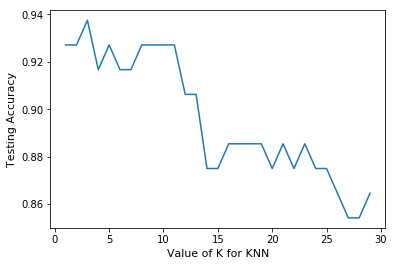

In [15]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Testing Accuracy',fontsize=11)

[0.929927536231884, 0.9342753623188406, 0.9419275362318841, 0.9509710144927535, 0.937927536231884, 0.937927536231884, 0.9419275362318841, 0.937927536231884, 0.9419275362318841, 0.9419275362318841, 0.9419275362318841, 0.938108695652174, 0.938108695652174, 0.9337608695652173, 0.9377608695652173, 0.9297608695652174, 0.938108695652174, 0.9337608695652173, 0.9337608695652173, 0.9257608695652175, 0.9257608695652175, 0.9257608695652175, 0.9257608695652175, 0.9217608695652174, 0.9217608695652174, 0.9219420289855073, 0.9219420289855073, 0.9135942028985508, 0.9172463768115942]


Text(0,0.5,'Cross-Validated Accuracy')

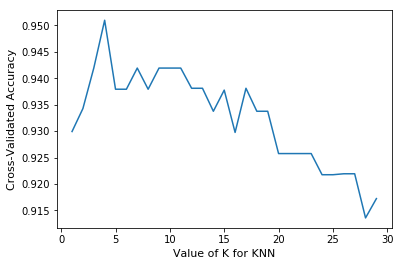

In [16]:
#k-fold cross validation for knn
k_scores = []
k_range = range(1,30)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, fluxes, ten_targets, cv=10, scoring='accuracy')
    k_scores.append(fold_scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Cross-Validated Accuracy',fontsize=11)

In [17]:
all_fluxes = []
all_values = []

for i in range(0,len(epoch)):
    for j in range(7,19):
        flux = data[i,0:12,j]
        
        flux[flux == -1.] = 0.
        
        all_fluxes.append(flux)
        
#all_fluxes = StandardScaler().fit_transform(all_fluxes)
print(np.shape(all_fluxes))

(15840, 12)


In [18]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(fluxes, ten_targets)
all_targets = knn.predict(all_fluxes)
print(Counter(all_targets))
print('fraction of strahl = ', Counter(all_targets)[1]/len(all_targets))

Counter({0: 7996, 1: 7844})
fraction of strahl =  0.4952020202020202


In [20]:
###### comparing to all knn predicted data
all_k_means = cluster.KMeans(n_clusters=4)
all_clusters = all_k_means.fit(all_fluxes)
all_clusters.labels_[all_clusters.labels_ == 2] = 1
all_clusters.labels_[all_clusters.labels_ == 3] = 1
print(Counter(all_clusters.labels_))

confusion = metrics.confusion_matrix(all_targets, all_clusters.labels_)
print(confusion)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(all_targets, all_clusters.labels_))
print("True positive rate = ", TP / float(TP + FN))
print("True negative rate = ", TN / float(TN + FP))
print("Positive precision rate = ", TP / float(TP + FP)) #how often a positive prediction is correct
print("F1 score = ", f1_score(all_targets, all_clusters.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(all_targets, all_clusters.labels_)) 

Counter({0: 8351, 1: 7489})
[[7405  591]
 [ 946 6898]]
Accuracy =  0.9029671717171717
True positive rate =  0.879398266190719
True negative rate =  0.9260880440220111
Positive precision rate =  0.9210842569101348
F1 score =  0.8997586904063132
Area under ROC curve =  0.9027431551063649


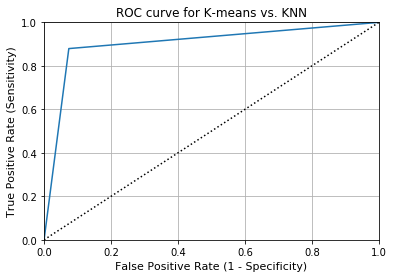

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(all_targets, all_clusters.labels_)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k:')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for K-means vs. KNN')
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=11)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=11)
plt.grid(True)

Text(0,0.5,'knn vs kmeans')

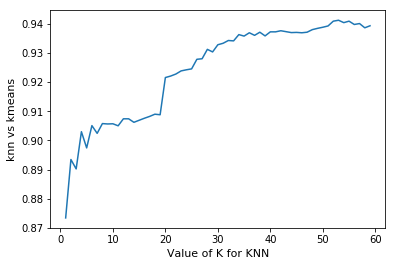

In [23]:
range_scores=[]
k_range = range(1,60)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(fluxes, ten_targets)
    range_targets = knn.predict(all_fluxes)
    range_scores.append(metrics.accuracy_score(range_targets, all_clusters.labels_))

plt.plot(k_range, range_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('knn vs kmeans',fontsize=11)

In [118]:
#comparing clustering (unknown no.) to my labels
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=None).fit(fluxes)
print(clustering.labels_)

confusion = metrics.confusion_matrix(clusters.labels_, clustering.labels_)
TN = confusion[0, 0]
Actual_N = np.sum(confusion[0,])
Pred_N = np.sum(confusion[:,0])

print("True negative rate = ", TN/Actual_N) #how often clustering is correct when actual value is 0(halo)
print("Negative precision rate = ", TN/np.sum(confusion[:,0])) #how often a prediction of 0(halo) is correct

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 0 0 0
 0 0 0 4 4 4 2 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 3 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 4 4 0 4 4 1 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 4 1 0 0 0 0 0 0
 0 0 4 4 4 1 0 0 0 0 0 0 0 0 0 1 0 4]
True negative rate =  1.0
Negative precision rate =  0.5891089108910891


# Flux vs Energy#

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


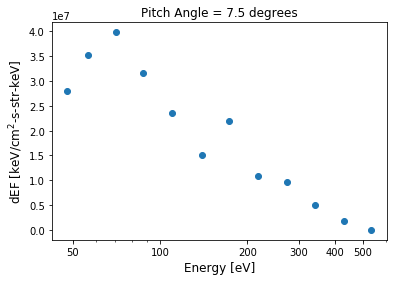

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


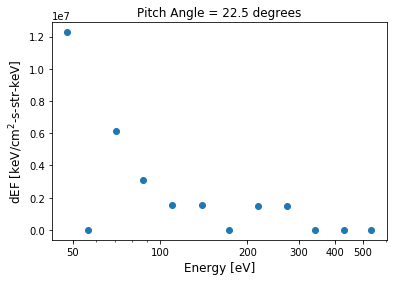

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


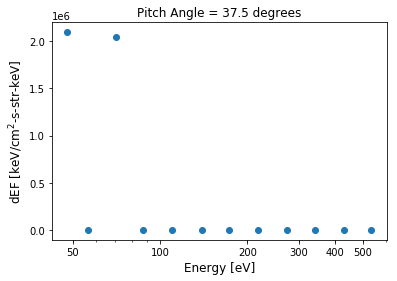

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


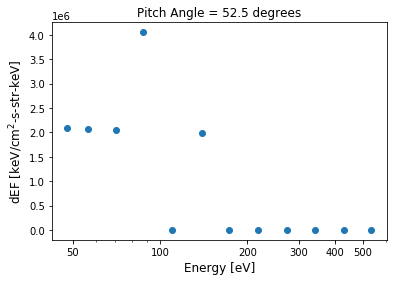

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


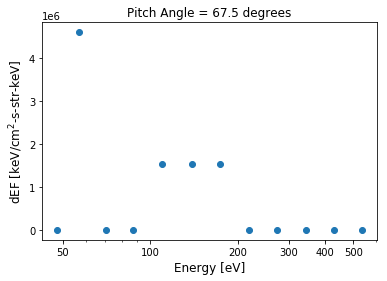

Text(0.5,0,'Energy [eV]')

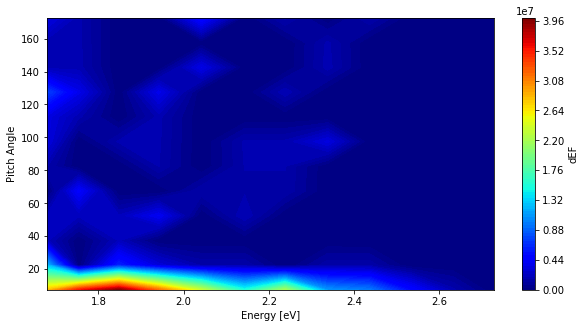

In [23]:
#PITCH_SPIN line plotting:

time = 500

for n in range(0,5):

    y1 = (data[time,n,7:19])
    #plt.scatter(np.log10(energy[time1]),y1)
    
    x1 = (energy[time,7:19])
    
    plt.scatter(x1,y1)
    plt.title("Pitch Angle = " + str(pa[n]) + " degrees")
    plt.xlabel("Energy [eV]",fontsize=12)
    plt.ylabel("dEF [keV/cm$^{2}$-s-str-keV]",fontsize=12)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xscale('log')
    ax = plt.axes()
    ax.set_xticks([50,100,200,300,400,500])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.show()
      
#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy[time,7:19],pa)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = data[time,0:len(pa),7:19]
surf = ax.contourf(np.log10(X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF')
ax.set_ylabel('Pitch Angle')
ax.set_xlabel('Energy [eV]')
#ax.set_xlim(0,5)

In [24]:
#halo = 0, strahl = 1
strahl_targets = [1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0,1,1,0, 1,0,0,0,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,1,1,0, 1,0,0,0,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,0,1,0,0]
print(len(strahl_targets)) 
print(Counter(strahl_targets))
print('fraction of strahl = ', Counter(strahl_targets)[1]/len(strahl_targets))

240
Counter({0: 199, 1: 41})
fraction of strahl =  0.17083333333333334


In [25]:
fluxes_e = []

for i in range(20):
    for j in range(0,12):
        flux_e = data[i*10+10,j,7:19]
        flux_e[flux_e == -1.] = 0.
        fluxes_e.append(flux_e)
        
#fluxes_e = StandardScaler().fit_transform(fluxes_e)
np.shape(fluxes_e)

(240, 12)

In [26]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
cluster_e = k_means.fit(fluxes_e)

#for (i, item) in enumerate(cluster_e.labels_, start=0):
#    print(i, cluster_e.labels_[i])

print('fraction of strahl = ', Counter(cluster_e.labels_)[1]/len(cluster_e.labels_)) #from kmeans

confusion = metrics.confusion_matrix(strahl_targets, cluster_e.labels_)
print(confusion)

TH = confusion[0, 0]
FS = confusion[0, 1]
FH = confusion[1, 0]
TS = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(strahl_targets, cluster_e.labels_))
print("Strahl recall rate = ", TS / float(TS + FH))
print("Strahl precision rate = ", TS / float(TS + FS)) #how often a strahl prediction is correct
print("Halo recall rate = ", TH / float(TH + FS))
print("Halo precision rate = ", TH / float(TH + FH)) #how often a halo prediction is correct
print("F1 score = ", f1_score(strahl_targets, cluster_e.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(strahl_targets, cluster_e.labels_)) 

fraction of strahl =  0.15833333333333333
[[198   1]
 [  4  37]]
Accuracy =  0.9791666666666666
Strahl recall rate =  0.9024390243902439
Strahl precision rate =  0.9736842105263158
Halo recall rate =  0.9949748743718593
Halo precision rate =  0.9801980198019802
F1 score =  0.9367088607594938
Area under ROC curve =  0.9487069493810515


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fluxes_e, strahl_targets, test_size=0.4, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 116, 1: 28})
Counter({0: 83, 1: 13})


In [28]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
y_p = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(clf, fluxes_e, strahl_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.8645833333333334
0.8292753623188405


In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_p = gnb.predict(x_test)
print(metrics.accuracy_score(y_test, y_p))
fold_scores = cross_val_score(gnb, fluxes_e, strahl_targets, cv=10, scoring='accuracy')
print(np.mean(fold_scores))

0.9166666666666666
0.9375


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9583333333333334


[0.9583333333333334, 0.96875, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.96875, 0.9583333333333334, 0.96875, 0.9583333333333334, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9583333333333334, 0.96875, 0.96875, 0.96875, 0.96875]


Text(0,0.5,'Testing Accuracy')

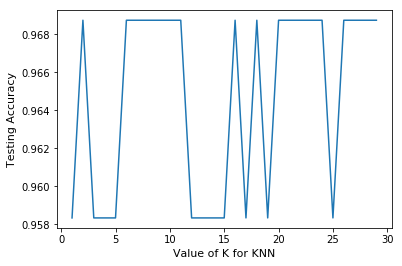

In [31]:
k_range = list(range(1, 30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Testing Accuracy',fontsize=11)

[0.9539710144927536, 0.9581376811594204, 0.9708188405797102, 0.974985507246377, 0.9749855072463769, 0.974985507246377, 0.9749855072463769, 0.9708188405797102, 0.9708188405797102, 0.9708188405797102, 0.9708188405797102, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.974985507246377, 0.9708188405797102, 0.974985507246377, 0.9666521739130435, 0.9666521739130435, 0.9666521739130435, 0.9666521739130435]


Text(0,0.5,'Cross-Validated Accuracy')

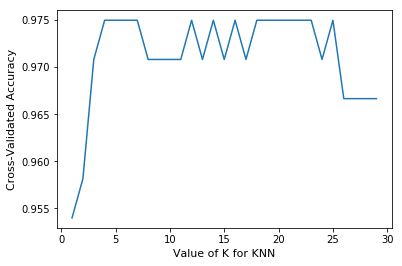

In [32]:
#k-fold cross validation for knn
k_scores = []
k_range = range(1,30)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, fluxes_e, strahl_targets, cv=10, scoring='accuracy')
    k_scores.append(fold_scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('Cross-Validated Accuracy',fontsize=11)

In [33]:
all_fluxes_e = []

for i in range(len(epoch)):
    for j in range(0,12):
        flux_e = data[i,j,7:19]
        flux_e[flux_e == -1.] = 0.
        all_fluxes_e.append(flux_e)
        
np.shape(all_fluxes_e)

(15840, 12)

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(fluxes_e, strahl_targets)
all_targets_e = knn.predict(all_fluxes_e)
print(Counter(all_targets_e))
print('fraction of strahl = ', Counter(all_targets_e)[1]/len(all_targets_e))

Counter({0: 14420, 1: 1420})
fraction of strahl =  0.08964646464646464


In [35]:
###### comparing to all knn predicted data
all_k_means_e = cluster.KMeans(n_clusters=2)
all_clusters_e = all_k_means_e.fit(all_fluxes_e)
print(Counter(all_clusters_e.labels_))

confusion = metrics.confusion_matrix(all_targets_e, all_clusters_e.labels_)
print(confusion)

print('fraction of strahl = ', Counter(all_clusters_e.labels_)[1]/len(all_clusters_e.labels_)) #from kmeans

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print("Accuracy = ", metrics.accuracy_score(all_targets_e, all_clusters_e.labels_))
print("True positive rate = ", TP / float(TP + FN))
print("True negative rate = ", TN / float(TN + FP))
print("Positive precision rate = ", TP / float(TP + FP)) #how often a positive prediction is correct
print("F1 score = ", f1_score(all_targets_e, all_clusters_e.labels_)) #harmonic mean of TPR and PPR
print("Area under ROC curve = ", roc_auc_score(all_targets_e, all_clusters_e.labels_)) 

Counter({0: 14036, 1: 1804})
[[14026   394]
 [   10  1410]]
fraction of strahl =  0.11388888888888889
Accuracy =  0.9744949494949495
True positive rate =  0.9929577464788732
True negative rate =  0.9726768377253814
Positive precision rate =  0.7815964523281597
F1 score =  0.8746898263027296
Area under ROC curve =  0.9828172921021273


Text(0,0.5,'knn vs kmeans')

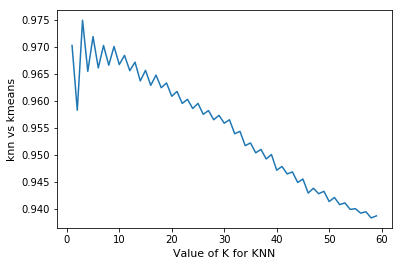

In [87]:
range_scores=[]
k_range = range(1,60)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(fluxes_e, strahl_targets)
    range_targets = knn.predict(all_fluxes_e)
    range_scores.append(metrics.accuracy_score(range_targets, all_clusters_e.labels_))

plt.plot(k_range, range_scores)
plt.xlabel('Value of K for KNN',fontsize=11)
plt.ylabel('knn vs kmeans',fontsize=11)

In [93]:
#comparing clustering (unknown no.) to my labels
from sklearn.cluster import MeanShift
clustering_e = MeanShift(bandwidth=None).fit(fluxes_e)
print(clustering_e.labels_)

confusion = metrics.confusion_matrix(strahl_targets, clustering_e.labels_)
TN = confusion[0, 0]
Actual_N = np.sum(confusion[0,])
Pred_N = np.sum(confusion[:,0])

print("True negative rate = ", TN/Actual_N) #how often clustering is correct when actual value is 0(halo)
print("Negative precision rate = ", TN/np.sum(confusion[:,0])) #how often a prediction of 0(halo) is correct

[ 2  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
 20  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0
  3  0  0  0  0  0  0  0  0  1  0  1 12  0  0  0  0  0  0  0  0  1  1  1
  2  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 18  0  0  0  0  0  0  0  0  1 10 11 21  0  0  0  0  0  0  0  0  1  6  9
  2  0  0  0  0  0  0  0  0  0  0  0  3  4  0  0  0  0  0  0  0  4 19  3
 21  0  0  0  0  0  0  0  0  0  1  0 15  0  0  0  0  0  0  0  0  0  0  0
 14  0  0  0  0  0  0  0  0 13  1  0  3  0  0  0  0  0  0  0  0  1 16 17
  4  0  0  0  0  0  0  0  1  1  2  1  2  0  0  0  0  0  0  0  0  4  4  0
  3  0  0  0  0  0  0  0  0  1  7  8  5  0  0  0  0  0  0  0  0  4  0  0]
True negative rate =  0.949748743718593
Negative precision rate =  1.0


# Pitch angle vs energy sample table #

In [43]:
pa_sample = np.array(np.array_split(clusters.labels_,len(clusters.labels_)/12))

In [44]:
energy_sample = np.array(np.array_split(cluster_e.labels_,len(cluster_e.labels_)/12))

In [45]:
labels_sample = []
for k in range(20):

    for i in range(12):
        for j in range(12):
            if energy_sample[k,i] and pa_sample[k,j] == 1:
                strahl = 1
            else:
                strahl = 0
            labels_sample.append(strahl)
            
labels_sample = np.array(np.array_split(labels_sample,20))
print(np.shape(labels_sample))

test_labels = []
for k in range(20):
    test_labels.append(np.array(np.array_split(labels_sample[k],12)))
    
print(np.shape(test_labels))

(20, 144)
(20, 12, 12)


# Pitch angle vs energy complete table

In [36]:
#K-means classifications
pa_all = np.array(np.array_split(all_clusters.labels_,len(all_clusters.labels_)/12))
energy_all = np.array(np.array_split(all_clusters_e.labels_,len(all_clusters_e.labels_)/12))

In [37]:
#KNN classifications
#pa_all = np.array(np.array_split(all_targets,len(all_targets)/12))
#energy_all = np.array(np.array_split(all_targets_e,len(all_targets_e)/12))

In [38]:
labels_all = []
for k in range(len(epoch)):

    for i in range(12):
        for j in range(12):
            if energy_all[k,i] and pa_all[k,j] == 1:
                strahl = 1
            else:
                strahl = 0
            labels_all.append(strahl)
            
labels_all = np.array(np.array_split(labels_all,len(epoch)))
print(np.shape(labels_all))

final_labels = []
for k in range(len(epoch)):
    final_labels.append(np.array(np.array_split(labels_all[k],12)))
    
final_labels = np.array(final_labels)
print(np.shape(final_labels))

(1320, 144)
(1320, 12, 12)


In [39]:
print(final_labels[440])#each row = different pa with 0 degrees at top, each column = different energy higher to lower

unique, counts = np.unique(final_labels, return_counts=True)
dict(zip(unique, counts)) #number of 1s and 0s across all times

[[0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


{0: 177163, 1: 12917}

Note: convert dEF to number density by using eq. (3.81), p. 189 in "Calibration of particle instruments in space physics"

In [41]:
halo_count = []
strahl_count = []
gaus_count = []

for k in range(len(epoch)):
    #print(k)
    for i in range(12):
        for j in range(12):
            if final_labels[k,i,j] == 0:
                #halo_count.append(data[k,i,7+j])
                halo_count.append(data[k,i,7+j]*((energy[k,7+j]-energy[k,7+(j+1)])/1000)/((energy[k,7+j]/1000)**1.5))
            else:
                #strahl_count.append(data[k,i,7+j])
                strahl_count.append(data[k,i,7+j]*((energy[k,7+j]-energy[k,7+(j+1)])/1000)/((energy[k,7+j]/1000)**1.5))
            
        if final_labels[k,i,11] == 1:
            x = np.log10(energy[k,7:19])
            y = data[k,i,7:19]

            n = len(x)                          #the number of data
            mean = sum(x * y) / sum(y)
            sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

            def gaus(x,a,x0,sigma):
                return a*np.exp(-(x-x0)**2/(2*sigma**2))
            #print(k)

            popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),mean,sigma],maxfev=1000000)

            x_scale = np.log10(energy[k,19:25])
            
            if gaus(np.log10(energy[k,20]),*popt) < gaus(np.log10(energy[k,19]),*popt):
                for n in range(19,21):
                    #gaus_count.append(gaus(np.log10(energy[k,n]),*popt))
                    gaus_count.append(gaus(np.log10(energy[k,n]),*popt)*((energy[k,n]-energy[k,n+1])/1000)/((energy[k,n]/1000)**1.5))
            
                

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:801: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq


In [42]:
print(np.shape(strahl_count))
print(np.shape(halo_count))
print(np.shape(gaus_count))

(12917,)
(177163,)
(2972,)


In [43]:
all_strahl_count = [*strahl_count,*gaus_count]
np.shape(all_strahl_count)

(15889,)

In [44]:
extra_halo = []
for k in range(len(epoch)):
    for i in range(12):
        for j in range(2,7):
            #extra_halo.append(data[k,i,j])
            extra_halo.append(data[k,i,j]*((energy[k,j]-energy[k,(j+1)])/1000)/(energy[k,j]/1000)**1.5)

all_halo_count = [*halo_count,*extra_halo]

In [45]:
core_count = []
for k in range(len(epoch)):
    for i in range(12):
        for j in range(19,26):
            #core_count.append(data[k,i,j])
            core_count.append(data[k,i,j]*((energy[k,j]-energy[k,(j+1)])/1000)/(energy[k,j]/1000)**1.5)
total_core = np.sum(core_count)-np.sum(gaus_count)

In [46]:
supra_count = []
for k in range(len(epoch)):
    for i in range(12):
        for j in range(2,19):
            #core_count.append(data[k,i,j])
            supra_count.append(data[k,i,j]*((energy[k,j]-energy[k,(j+1)])/1000)/(energy[k,j]/1000)**1.5)
total_supra = np.sum(supra_count)+np.sum(gaus_count)

In [47]:
#strahl/halo ratio in suprathermal range
total_strahl = (np.sum(strahl_count)-len(strahl_count)*np.mean(halo_count))
total_halo = (np.sum(all_halo_count)+(len(strahl_count)*np.mean(halo_count)))

In [48]:
print(total_strahl/total_halo)
print(total_supra/total_core)

0.7923245864084325
0.10752960760488


In [49]:
print(energy[0,0:30])

[2531.    2030.1   1621.7   1296.2   1039.9    832.28   669.21   534.17
  428.84   342.73   273.     217.89   173.09   139.08   110.09    87.464
   70.462   56.717   47.865   37.66    30.091   24.348   19.568   15.779
   12.543   10.073    8.47     7.294    6.251    5.252]


# 3D plot of k-means labelling

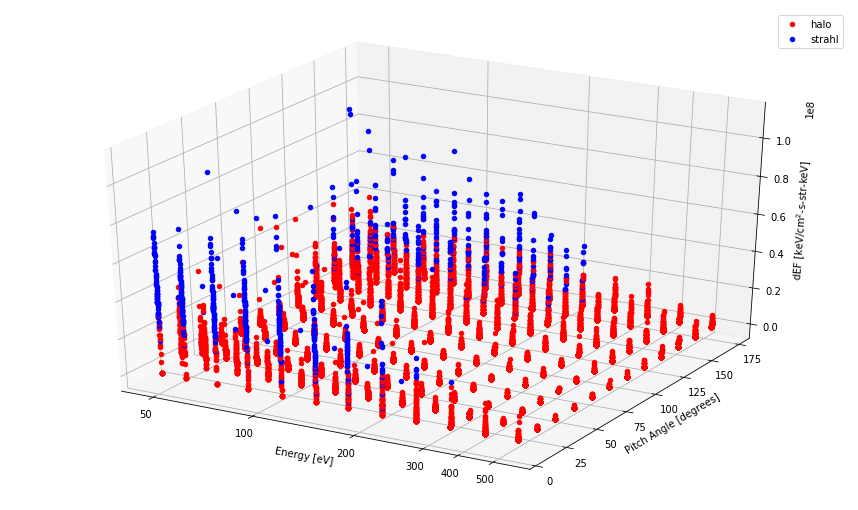

In [51]:
%matplotlib inline
X, Y = np.meshgrid(np.log10(energy[0:10,7:19]),pa)
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111,projection='3d')
#ax.scatter(np.log10(X),Y,data[0:10,0:12,7:19],c='r')

for k in range(100):
    for i in range(12):
        for j in range(12):
            if final_labels[k*10,i,j] == 0:
                h = ax.scatter(np.log10(energy[k*10,j+7]),pa[i],data[k*10,i,j+7],c='r')
            else:
                s = ax.scatter(np.log10(energy[k*10,j+7]),pa[i],data[k*10,i,j+7],c='b')
                
ax.legend((h,s),('halo','strahl'))
ax.set_xticks([1.7,2.0,2.3,2.5,2.6,2.7])
ax.set_xticklabels([50,100,200,300,400,500]) #swap log base 10 values of 50,100 etc to 50,100 etc
ax.set_ylabel('Pitch Angle [degrees]')
ax.set_xlabel('Energy [eV]')
ax.set_zlabel('dEF [keV/cm$^{2}$-s-str-keV]')
plt.show()

# Medium Wind

In [52]:
cdf2 = pycdf.CDF('/Users/mayur/PhD/Cluster_data/C2_CP_PEA_PITCH_SPIN_DEFlux__20030130_003800_20030130_013500_V170624.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf2, start=0):
    print(i, item, cdf2[i])

0 time_tags__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [854]
1 time_tags_DeltaLower__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854]
2 time_tags_DeltaUpper__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854]
3 Angle_SR2phi__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854]
4 Mode_SunpulseRephaseOffset__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
5 Mode_Sensor__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
6 Mode_SweepMode_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
7 Mode_Preset_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
8 Mode_EnergyLevelRange_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854, 2]
9 Mode_EnergyMaxMin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [854, 2]
10 Mode_MCPlevel_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
11 Mode_DataOrigin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
12 Mode_SweepMode_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
13 Mode_Preset_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854]
14 Mode_EnergyLevelRange_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [854,

In [53]:
epoch2 = cdf2[0][...]
data2 = cdf2[26][...]
energy2 = cdf2[20][...]
pa2 = cdf2[23][...]

In [54]:
all_fluxes2 = []
all_values2 = []

for i in range(0,len(epoch2)):
    for j in range(9,21):
        flux2 = data2[i,0:12,j]
        
        #if np.max(flux2)>0:
        #    flux2 = (flux2-np.min(flux2))/(np.max(flux2)-np.min(flux2))
        
        flux2[flux2 == -1.] = 0.
        
        all_fluxes2.append(flux2)
        
#all_fluxes2 = StandardScaler().fit_transform(all_fluxes2)
print(np.shape(all_fluxes2))

(10248, 12)


In [55]:
all_clusters2 = all_k_means.predict(all_fluxes2)
all_clusters2[all_clusters2 == 2] = 1
all_clusters2[all_clusters2 == 3] = 1
print(Counter(all_clusters2))

# for (i, item) in enumerate(all_clusters2, start=0):
#     print(i, all_clusters2[i])

Counter({0: 5813, 1: 4435})


In [56]:
all_fluxes_e2 = []

for i in range(len(epoch2)):
    for j in range(0,12):
        flux_e2 = data2[i,j,9:21]
        flux_e2[flux_e2 == -1.] = 0.
        all_fluxes_e2.append(flux_e2)
        
#all_fluxes_e2 = StandardScaler().fit_transform(all_fluxes_e2)
np.shape(all_fluxes_e2)

(10248, 12)

In [57]:
all_clusters_e2 = all_k_means_e.predict(all_fluxes_e2)
print(Counter(all_clusters_e2))

#for (i, item) in enumerate(all_clusters_e2, start=0):
#    print(i, all_clusters_e2[i])

Counter({0: 8560, 1: 1688})


In [58]:
pa_all2 = np.array(np.array_split(all_clusters2,len(all_clusters2)/12))

In [59]:
energy_all2 = np.array(np.array_split(all_clusters_e2,len(all_clusters_e2)/12))

In [60]:
labels_all2 = []
for k in range(len(epoch2)):

    for i in range(12):
        for j in range(12):
            if energy_all2[k,i] and pa_all2[k,j] == 1:
                strahl2 = 1
            else:
                strahl2 = 0
            labels_all2.append(strahl2)
            
labels_all2 = np.array(np.array_split(labels_all2,len(epoch2)))
print(np.shape(labels_all2))

final_labels2 = []
for k in range(len(epoch2)):
    final_labels2.append(np.array(np.array_split(labels_all2[k],12)))
    
final_labels2 = np.array(final_labels2)
print(np.shape(final_labels2))

(854, 144)
(854, 12, 12)


In [61]:
print(final_labels2[374])#each row = different pa with 0 degrees at top, each column = different energy higher to lower

unique2, counts2 = np.unique(final_labels2, return_counts=True)
dict(zip(unique2, counts2)) #number of 1s and 0s across all times

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]]


{0: 113717, 1: 9259}

In [66]:
halo_count2 = []
strahl_count2 = []

for k in range(len(epoch2)):
    for i in range(12):
        for j in range(12):
            if final_labels2[k,i,j] == 0:
                #halo_count2.append(data2[k,i,9+j])
                halo_count2.append(data2[k,i,9+j]*((energy2[k,9+j]-energy2[k,9+(j+1)])/1000)/((energy2[k,9+j]/1000)**1.5))
            else:
                #strahl_count2.append(data2[k,i,7+j])
                strahl_count2.append(data2[k,i,9+j]*((energy2[k,9+j]-energy2[k,9+(j+1)])/1000)/((energy2[k,9+j]/1000)**1.5))


In [67]:
print(np.shape(strahl_count2))
print(np.shape(halo_count2))

(9259,)
(113717,)


In [68]:
extra_halo2 = []
for k in range(len(epoch2)):
    for i in range(12):
        for j in range(6,9):
            #extra_halo2.append(data2[k,i,j])
            extra_halo2.append(data2[k,i,j]*((energy2[k,j]-energy2[k,(j+1)])/1000)/(energy2[k,j]/1000)**1.5)

all_halo_count2 = [*halo_count2,*extra_halo2]

In [69]:
core_count2 = []
for k in range(len(epoch2)):
    for i in range(12):
        for j in range(21,30):
            #core_count2.append(data2[k,i,j])
            core_count2.append(data2[k,i,j]*(np.abs(energy2[k,j]-energy2[k,(j-1)])/1000)/(energy2[k,j]/1000)**1.5)
total_core2 = np.sum(core_count2)

In [70]:
supra_count2 = []
for k in range(len(epoch2)):
    for i in range(12):
        for j in range(6,21):
            supra_count2.append(data2[k,i,j]*((energy2[k,j]-energy2[k,(j+1)])/1000)/(energy2[k,j]/1000)**1.5)
total_supra2 = np.sum(supra_count2)

In [71]:
#strahl/halo ratio in suprathermal range
total_strahl2 = (np.sum(strahl_count2)-len(strahl_count2)*np.mean(halo_count2))
total_halo2 = (np.sum(all_halo_count2)+(len(strahl_count2)*np.mean(halo_count2)))

In [72]:
print(total_strahl2/total_halo2)
print(total_supra2/total_core2)

0.409172286734023
0.04239244961298214


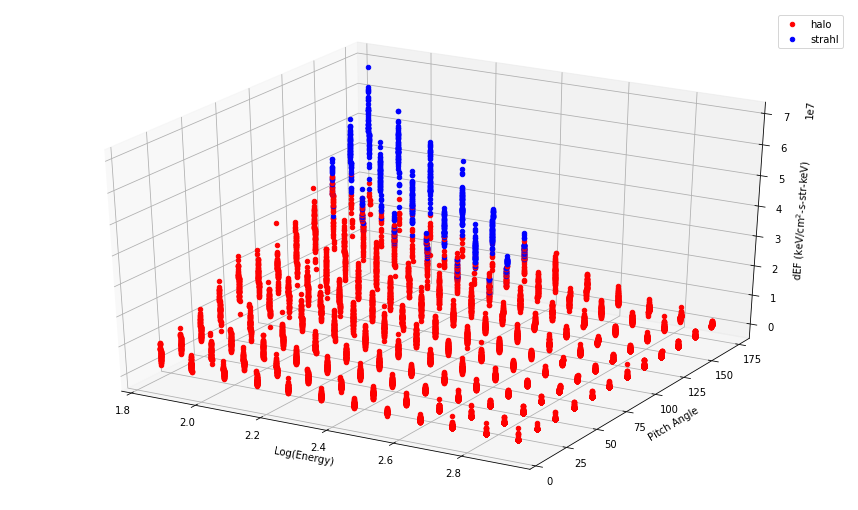

In [73]:
#%matplotlib qt
X, Y = np.meshgrid(energy2[0:10,9:21],pa2)
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111,projection='3d')
#ax.scatter(np.log10(X),Y,data2[0:10,0:12,9:21],c='r')

for k in range(80):
    for i in range(12):
        for j in range(12):
            if final_labels2[k*10,i,j] == 0:
                h = ax.scatter(np.log10(energy2[k*10,j+9]),pa2[i],data2[k*10,i,j+9],c='r')
            else:
                s = ax.scatter(np.log10(energy2[k*10,j+9]),pa2[i],data2[k*10,i,j+9],c='b')
                
ax.legend((h,s),('halo','strahl'))
ax.set_ylabel('Pitch Angle')
ax.set_xlabel('Log(Energy)')
ax.set_zlabel('dEF (keV/cm$^{2}$-s-str-keV)')
plt.show()